<a href="https://colab.research.google.com/github/Aleksandra2002/obliczenia_naukowe/blob/main/lab15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresja liniowa

In [1]:
from sklearn import datasets #zbiory danych
from sklearn import model_selection #podział danych na uczące i testowe
from sklearn import linear_model
from sklearn import metrics #miary do oceny pracy modelu

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [2]:
X_all, y_all=datasets.make_regression(n_samples=50, n_features=50, n_informative=10)

In [3]:
X_all.shape

(50, 50)

In [4]:
y_all.shape

(50,)

In [5]:
X_train,X_test,y_train,y_test=model_selection.train_test_split(X_all,y_all,test_size=25)

In [6]:
X_train.shape

(25, 50)

In [7]:
model=linear_model.LinearRegression()

In [8]:
model.fit(X_train,y_train)

LinearRegression()

In [9]:
y_predict=model.predict(X_test)

In [10]:
(y_test-y_predict).std()

199.40641803335447

In [11]:
np.sqrt(metrics.mean_squared_error(y_test,y_predict))

199.5747771754716

In [12]:
np.sqrt(metrics.mean_squared_error(y_train,model.predict(X_train)))

3.228679921121088e-13

In [13]:
def rysuj_reszty_i_współczynniki(resid_train, resid_test, coeff):
    fig, axes = plt.subplots(1, 3, figsize=(12, 3))
    axes[0].bar(np.arange(len(resid_train)), resid_train)
    axes[0].set_xlabel("Numer próbki")
    axes[0].set_ylabel("Reszta")
    axes[0].set_title("Zbiór uczący")
    axes[1].bar(np.arange(len(resid_test)), resid_test)
    axes[1].set_xlabel("Numer próbki")
    axes[1].set_ylabel("Reszta")
    axes[1].set_title("Zbiór testowy")
    axes[2].bar(np.arange(len(coeff)), coeff)
    axes[2].set_xlabel("Numer współczynnika")
    axes[2].set_ylabel("Wartość współczynnika")
    fig.tight_layout()
    return fig, axes

(<Figure size 864x216 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f17c94c3350>,
       dtype=object))

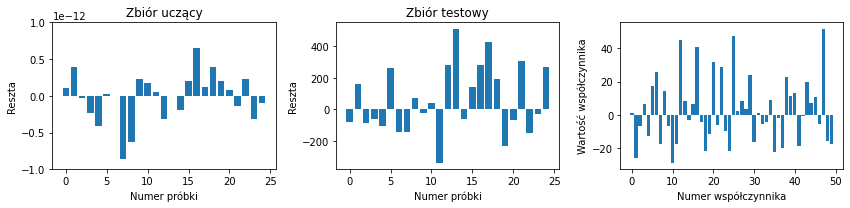

In [14]:
rysuj_reszty_i_współczynniki(y_train-model.predict(X_train),y_test-model.predict(X_train),model.coef_)

## Sposoby poprawienia modelu regresji
Model domyślnie dopasowuje się metodą najmniejszych kwadratów, czyli minimalizuje funkcję sse. Możemy zmienić tę 'taktykę' dodając 'karę' za jakość dobranych współczynników:
* metoda LASSO, ```linear_model.Lasso``` (preferuje jak najmniej niezerowych współczynników)
* regresja grzebietowa, ```linear_model.Ridge``` (preferuje jak najmniejsze współczynniki)

## Zadanie
* dokonaj podziału danych na uczące i testowe
* przeprowadź analizę regresji metodą Lasso lub regresją grzbietową z ustalonym współczynnikiem $\alpha$ 
* sprawdź błąd kwadratowy na danych uczących i na danych testowych
* oceń dopasowanie modelu metodą score
* sporządź rysunki za pomocą zdefiniowanej wyżej funkcji ```rysuj_reszty_i_współczynniki```

In [15]:
model2=linear_model.Ridge()
model2.fit(X_train,y_train)
y_predict=model2.predict(X_test)

In [16]:
np.sqrt(metrics.mean_squared_error(y_predict,y_test))

196.75104952742365

In [17]:
model2.score(X_train,y_train)

0.9993225335052273

In [18]:
model2.score(X_test,y_test)

-0.292905395529651

(<Figure size 864x216 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f17c3aa6710>,
       dtype=object))

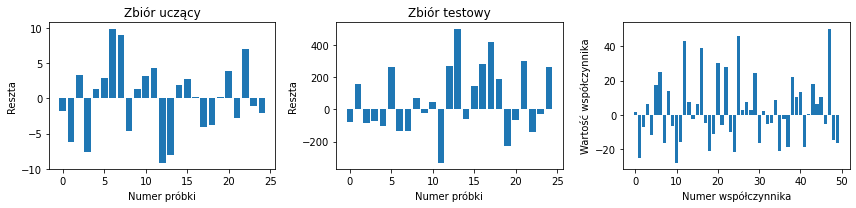

In [19]:
rysuj_reszty_i_współczynniki(y_train-model2.predict(X_train),y_test-model2.predict(X_train),model2.coef_)

# Klasyfikacja
Dokonamy klasyfikacji (przypisania do grup) danych na podstawie zbioru danych cech irysów. Korzystamy z modelu ```linear_model.LogisticRegression```. Można też wykorzystać w tym celu:
* drzewa decyzyjne ```tree.DecisionTreeClassifier```
* metodę najbliższego sąsiada ```neighbors.KNeighborsClassifier```

In [20]:
irysy=datasets.load_iris()

In [21]:
type(irysy)

sklearn.utils.Bunch

In [22]:

X_all=irysy.data
y_all=irysy.target

In [23]:
X_train,X_test,y_train,y_test=model_selection.train_test_split(X_all,y_all)

In [24]:
model=linear_model.LogisticRegression()

In [25]:
model.fit(X_train,y_train)

LogisticRegression()

In [26]:
y_predict=model.predict(X_test)

In [27]:
y_predict-y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [28]:
print(metrics.classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.88      0.94        17
           2       0.80      1.00      0.89         8

    accuracy                           0.95        38
   macro avg       0.93      0.96      0.94        38
weighted avg       0.96      0.95      0.95        38



## Zadanie 
Spośród cech irysów wybierz tylko dwie i dokonaj klasyfikacji gatunków za ich pomocą metodą najbliższych trzech sąsiadów (dla wcześniej zdefiniowanego podziału). Narysuj wykres punktowy opisujący te dwie wybrane cechy i z kolorami punktów zależnymi od klasyfikacji (na danych testowych). Obok narysuj ten sam wykres z oryginalną klasyfikacją.

neighbors.KNeighborsClassifier

In [29]:
irysy.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [30]:
from sklearn import neighbors
model=neighbors.KNeighborsClassifier(3)
x=0
y=2
model.fit(X_train[:,[x,y]],y_train)

KNeighborsClassifier(n_neighbors=3)

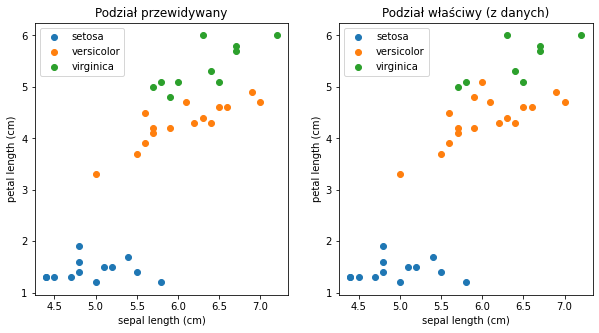

In [31]:
y_predict=model.predict(X_test[:,[x,y]])

fig,ax=plt.subplots(1,2,figsize=(10,5))
for i in range(3):
    maska=(y_predict == i)
    ax[0].scatter(X_test[:,x][maska],X_test[:,y][maska],label=irysy.target_names[i])
    ax[0].set(title='Podział przewidywany', xlabel=irysy.feature_names[x],ylabel=irysy.feature_names[y])
ax[0].legend()

for i in range(3):
    maska=(y_test == i)
    ax[1].scatter(X_test[:,x][maska],X_test[:,y][maska],label=irysy.target_names[i])
    ax[1].set(title='Podział właściwy (z danych)', xlabel=irysy.feature_names[x],ylabel=irysy.feature_names[y])
ax[1].legend()

## Zadanie domowe
* wygeneruj dane do regresji liniowej z 100 próbkami, 40 cechami, w tym 20 istotnymi i wybranym random_state
* przeprowadź analizę metodą Lasso dla różnych parametrów $\alpha$ i spróbuj określić jaki współczynnik jest najlepszy dla przewidywania przyszłych wyników

####1.06 

In [50]:
#klasteryzacja- bez etykiet
irysy=datasets.load_iris() #wczytanie danych o irysach
type(irysy) #kontener danych
X=irysy.data #macierz X
y=irysy.target

In [51]:
from sklearn.cluster import KMeans
model_KM = KMeans(3)
model_KM.fit(X)

KMeans(n_clusters=3)

In [52]:
y_pred = model_KM.predict(X)

In [54]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [57]:
maska0=(y_pred==0)

In [58]:
maska1=(y_pred==1)

In [60]:
print(metrics.classification_report(y,y_pred)) #metryka

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.77      0.96      0.86        50
           2       0.95      0.72      0.82        50

    accuracy                           0.89       150
   macro avg       0.91      0.89      0.89       150
weighted avg       0.91      0.89      0.89       150



In [62]:
metrics.confusion_matrix(y,y_pred) #najpierw zawsze prawdziwy

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0, 14, 36]])

In [55]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

MeanShift

In [71]:
from sklearn.cluster import MeanShift
model_MS= MeanShift()
model_MS.fit(X)
y_pred = model_MS.predict(X)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [73]:
#szybszy zapis
model_MS.fit_predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Metoda PCA - redukcja wymiarowości

In [77]:
from sklearn.decomposition import PCA
#redukcja wymiarów irysów
redukcja=PCA(n_components=2) #ile chcemy miec skladowych
redukcja.fit(X) #teraz zamiast predict mamy transform
X_new =redukcja.fit_transform(X)

In [78]:
target_name=irysy.target_names
for i, target_name in zip([0,1,2],irysy.target_names):
  plt.scatter(
      X_new[y==1]
  )
plt.legend

In [79]:
from sklearn.datasets import load_breast_cancer
rak=load_breast_cancer()

In [84]:
X=rak.data
y=rak.target
rak.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [83]:
X.shape #sprawdzamy wymiar X

(569, 30)

In [88]:
#skalowanie danych
from sklearn.preprocessing import StandardScaler
skala = StandardScaler()
X_new = skala.fit_transform(X)

In [92]:
model_PCA= PCA(n_components=2)
X_final =model_PCA.fit_transform(X_new)

In [90]:
X_new.mean()

-6.118909323768877e-16

In [91]:
X_new.var()

1.0

In [96]:
rakDF = pd.DataFrame(data=X_final, columns=['skladowa1','skladowa2'])

In [97]:
#sprawdzamy ile nam ucięło wariancji z model_PCA
model_PCA.explained_variance_ratio_

array([0.44272026, 0.18971182])

skladowa1 przyjęła 44% wariancji, a skladowa2 przyjęła 19%

In [107]:
wina = datasets.load_wine()
X=wina.data
y=wina.target

In [108]:
X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y)

In [112]:
skala= StandardScaler()
X_train = skala.fit_transform(X_train)
X_test=skala.fit_transform(X_test)
model_pca=PCA(n_components=0.9)
X_tr = model_pca.fit_transform(X_train)
X_test = model_pca.transform(X_test)

In [113]:
model_pca.n_components_

8